In [5]:
%matplotlib inline

In [1]:
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
import pca_fn
A = imread('chart.png') # load an image

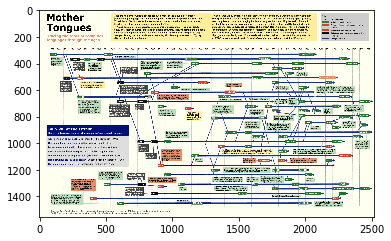

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('chart.png')
plt.imshow(img)

In [8]:
import numpy as np
A = np.mean(img,2)

In [9]:
A

array([[ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497],
       [ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497],
       [ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497],
       ..., 
       [ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497],
       [ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497],
       [ 0.97908497,  0.97908497,  0.97908497, ...,  0.97908497,
         0.97908497,  0.97908497]], dtype=float32)

In [12]:
full_pc = np.size(A,axis=1)
full_pc

2520

In [14]:
import pca_fn

In [21]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud,argsort

def princomp(A,numpc=0):
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
 [latent,coeff] = linalg.eig(cov(M))
 p = size(coeff,axis=1)
 idx = argsort(latent) # sorting the eigenvalues
 idx = idx[::-1]       # in ascending order
 # sorting eigenvectors according to the sorted eigenvalues
 coeff = coeff[:,idx]
 latent = latent[idx] # sorting eigenvalues
 if numpc < p and numpc >= 0:
  coeff = coeff[:,range(numpc)] # cutting some PCs if needed
 score = dot(coeff.T,M) # projection of the data in the new space
 return coeff,score,latent

TypeError: Image data can not convert to float

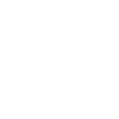

In [25]:
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
 coeff, score, latent = princomp(A,numpc)
 Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
 # difference in Frobenius norm
 dist.append(linalg.norm(A-Ar,'fro'))
 # showing the pics reconstructed with less than 50 PCs
 if numpc <= 50:
  ax = subplot(2,3,i,frame_on=False)
  ax.xaxis.set_major_locator(NullLocator()) # remove ticks
  ax.yaxis.set_major_locator(NullLocator())
  i += 1 
  plt.imshow(flipud(Ar))
  title('PCs # '+str(numpc))
  gray()

In [18]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud,argsort


TypeError: Image data can not convert to float

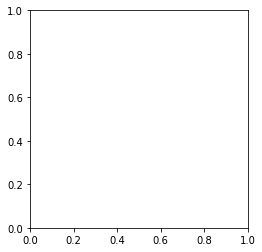

In [23]:
 plt.imshow(flipud(Ar))
    

In [24]:
flipud(Ar)

array([[ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j],
       [ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j],
       [ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j],
       ..., 
       [ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j],
       [ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j],
       [ 0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j, ...,
         0.97909307+0.j,  0.97909307+0.j,  0.97909307+0.j]])